# Runner (dry run)

This file is used to run simulations.

## 1. First run a PyPSA simulation

### 1.1 First lets clean up data and display global informations

In [27]:
import os

if not os.getcwd().endswith('pypsa-eur-climact'):
    %cd ../..
%pwd

'/Users/climact/pypsa/pypsa-eur-climact'

In [28]:
from pathlib import Path

# Basic parameters to check
run_name = "runner"
config_file = "config.tgi.runner.yaml"
rule = "all"

# Derived parameters
graphs_path = Path("analysis",run_name, "graphs")

In [29]:
# Cleaning commands
! snakemake --unlock
#! snakemake -call purge

Unlocking working directory.


Now that everything is clean, let's build graphs.

Config file config.yaml is extended by additional config specified via the command line.
Building DAG of jobs...
Config file config.yaml is extended by additional config specified via the command line.
Building DAG of jobs...
Config file config.yaml is extended by additional config specified via the command line.
Building DAG of jobs...


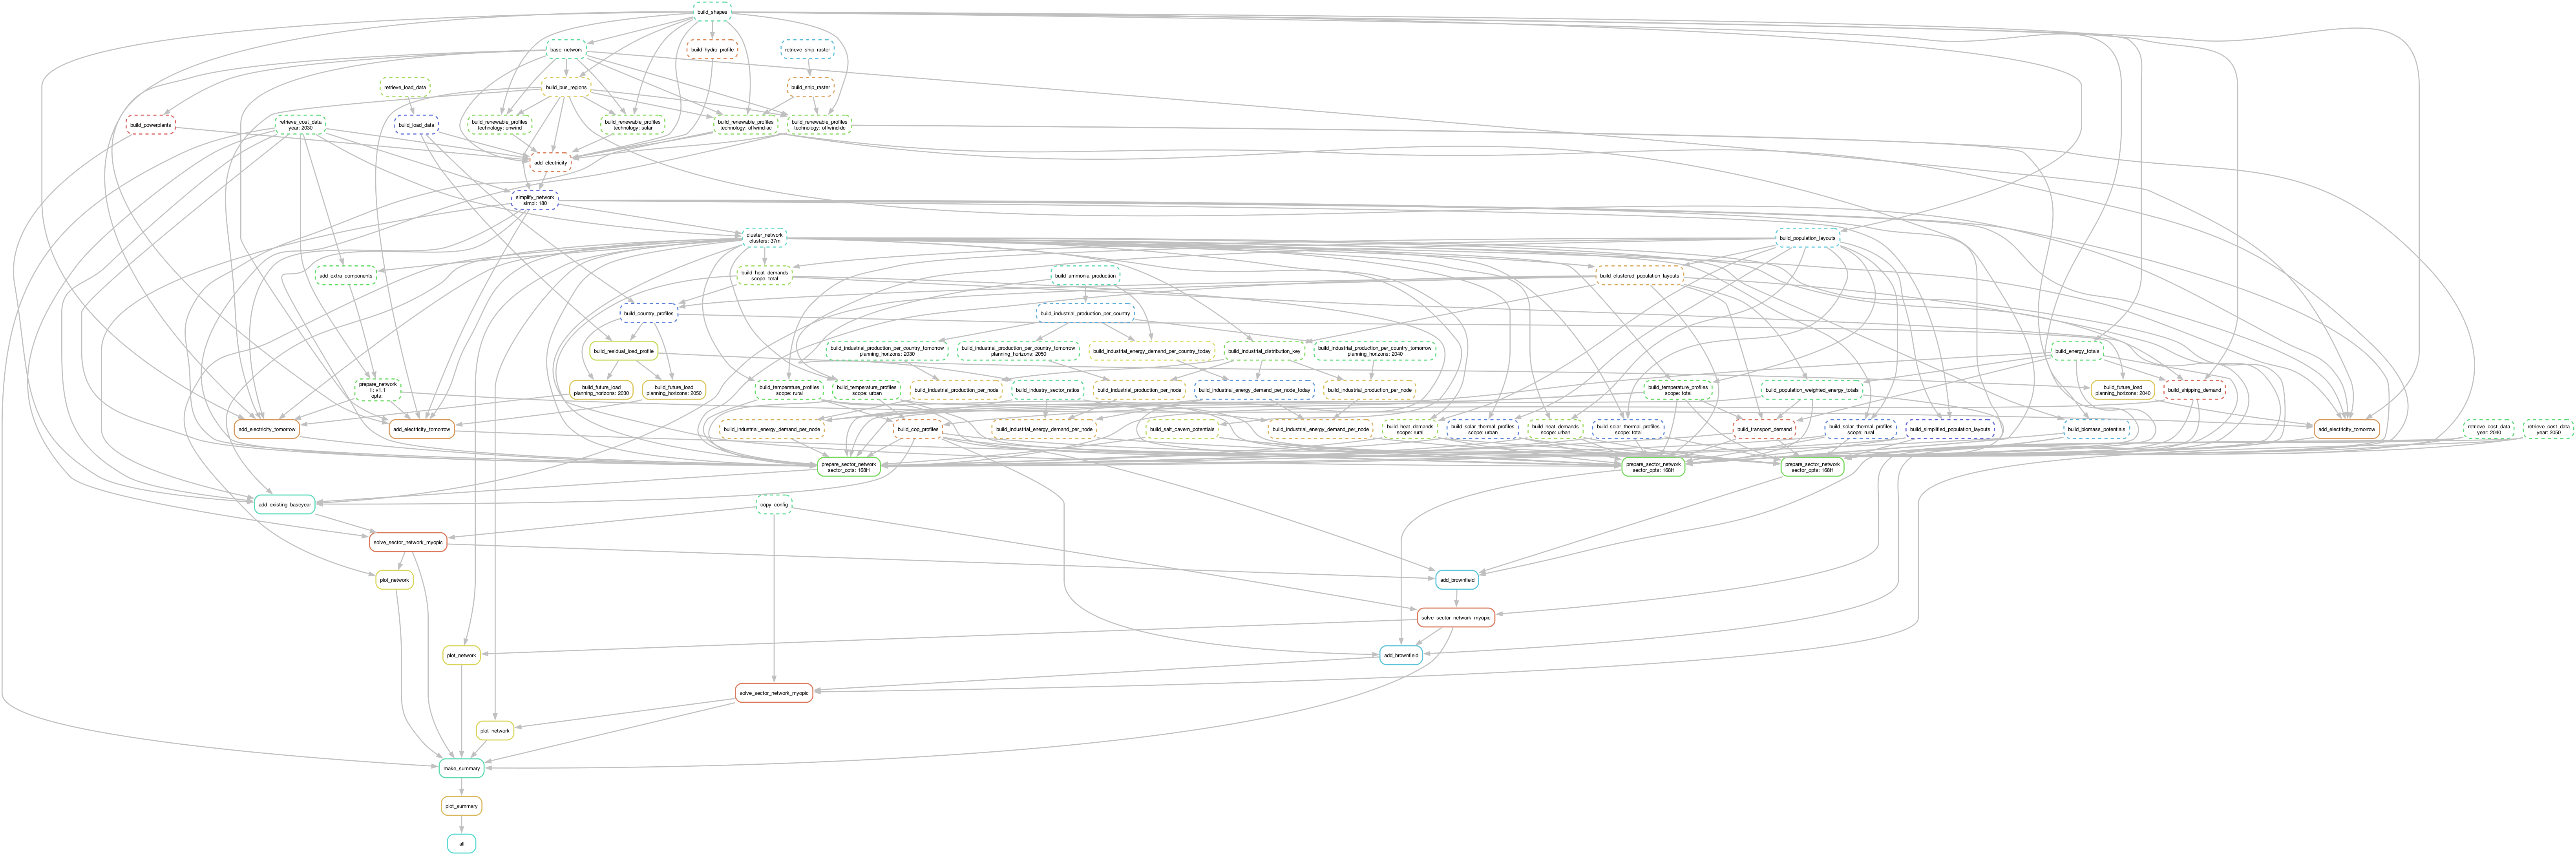

In [30]:
dag = Path(graphs_path, "dag.png")
rulegraph = Path(graphs_path, "rulegraph.png")
filegraph = Path(graphs_path, "filegraph.png")

!snakemake --configfile {config_file} --dag all | dot -Tpng -o {dag}
!snakemake --configfile {config_file} --rulegraph all | dot -Tpng -o {rulegraph}
!snakemake --configfile {config_file} --filegraph all | dot -Tpng -o {filegraph}

from IPython.display import Image
Image(filename=dag)

And let create an overview of output files.

In [31]:
summary = Path(graphs_path, "summary.csv")

!snakemake --configfile {config_file} --detailed-summary all | sed 's/,/;/g' | sed 's/\t/,/g' > {summary}

Config file config.yaml is extended by additional config specified via the command line.
Building DAG of jobs...


### 1.2. Run code

In [32]:
!snakemake -call -n {rule} --configfile {config_file} --keep-going

Config file config.yaml is extended by additional config specified via the command line.
Building DAG of jobs...
Job stats:
job                            count    min threads    max threads
---------------------------  -------  -------------  -------------
add_brownfield                     2              4              4
add_electricity_tomorrow           3              1              1
add_existing_baseyear              1              1              1
all                                1              1              1
build_future_load                  3              1              1
build_residual_load_profile        1              1              1
make_summary                       1              2              2
plot_network                       3              2              2
plot_summary                       1              2              2
prepare_sector_network             3              1              1
solve_sector_network_myopic        3              4              4
total